In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

df=pd.read_csv(r"C:\Users\kavin\OneDrive\Desktop\clustering k means\CC GENERAL.csv")
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [2]:
df_sample = df.sample(n=2000, random_state=42)  
print(df_sample.shape)
df_sample.to_csv("CC_GENERAL_SAMPLE.csv", index=False)

(2000, 18)


In [3]:
df1=pd.read_csv(r"C:\Users\kavin\OneDrive\Desktop\clustering k means\CC_GENERAL_SAMPLE.csv")
df1

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C17875    16.834929           0.454545      15.00             15.00   
1     C16296   540.020858           1.000000     612.23            495.61   
2     C17219   119.237712           1.000000     342.74              0.00   
3     C13108   894.081947           1.000000    1901.71           1853.11   
4     C13576  1294.145453           1.000000    3059.10           1836.98   
...      ...          ...                ...        ...               ...   
1995  C18430   482.028341           1.000000     106.47              0.00   
1996  C11405  9680.188434           1.000000       0.00              0.00   
1997  C12679   393.700868           1.000000       0.00              0.00   
1998  C16863  1508.132993           0.750000       0.00              0.00   
1999  C11200    25.659372           0.181818     951.10            951.10   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0.00    209.025389             0.090909   
1                     116.62   1708.923217             0.666667   
2                     342.74      0.000000             1.000000   
3                      48.60    206.618780             0.666667   
4                    1222.12      0.000000             1.000000   
...                      ...           ...                  ...   
1995                  106.47      0.000000             0.500000   
1996                    0.00   2034.051299             0.000000   
1997                    0.00    673.644618             0.000000   
1998                    0.00   2418.319143             0.000000   
1999                    0.00      0.000000             0.166667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.090909                          0.000000   
1                       0.166667                          0.500000   
2                       0.000000                          1.000000   
3                       0.666667                          0.416667   
4                       0.416667                          1.000000   
...                          ...                               ...   
1995                    0.000000                          0.500000   
1996                    0.000000                          0.000000   
1997                    0.000000                          0.000000   
1998                    0.000000                          0.000000   
1999                    0.166667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.090909                 1              1        7500.0   
1                   0.333333                10             10        2000.0   
2                   0.000000                 0             20        2000.0   
3                   0.083333                 1             33        1500.0   
4                   0.000000                 0             42        7000.0   
...                      ...               ...            ...           ...   
1995                0.000000                 0              9        2500.0   
1996                0.166667                 3              0       12000.0   
1997                0.166667                 3              0        1000.0   
1998                0.375000                11              0        2500.0   
1999                0.000000                 0              2        6000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      430.213001         86.959785          0.000000      11  
1     1642.068707        419.956251          0.000000      12  
2      327.166041        165.207233          0.000000      12  
3      947.130141        220.745296          0.000000      12  
4     5560.033502        497.637767          0.083333      12  
...           ...               ...               ...     ...  
1995   184.166639        179.412181  

In [4]:
df1.isna().sum()

CUST_ID                              0
BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    61
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

In [ ]:
df1["MINIMUM_PAYMENTS"].fillna(df1["MINIMUM_PAYMENTS"].mean(), inplace=True)
df1.isna().sum()

C:\Users\kavin\AppData\Local\Temp\ipykernel_28512\2108262385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["MINIMUM_PAYMENTS"].fillna(df1["MINIMUM_PAYMENTS"].mean(), inplace=True)


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
df1.shape

(2000, 18)

In [7]:
df1.duplicated().sum()

np.int64(0)

In [8]:
df1.drop("CUST_ID",axis=1,inplace=True)

In [9]:
df1.skew()

BALANCE                              2.240747
BALANCE_FREQUENCY                   -2.085948
PURCHASES                            9.155341
ONEOFF_PURCHASES                    10.937412
INSTALLMENTS_PURCHASES               8.979826
CASH_ADVANCE                         3.602352
PURCHASES_FREQUENCY                  0.052011
ONEOFF_PURCHASES_FREQUENCY           1.510939
PURCHASES_INSTALLMENTS_FREQUENCY     0.500100
CASH_ADVANCE_FREQUENCY               1.730251
CASH_ADVANCE_TRX                     3.064357
PURCHASES_TRX                        3.743617
CREDIT_LIMIT                         1.755578
PAYMENTS                             7.416544
MINIMUM_PAYMENTS                    10.946561
PRC_FULL_PAYMENT                     1.953269
TENURE                              -2.934435
dtype: float64

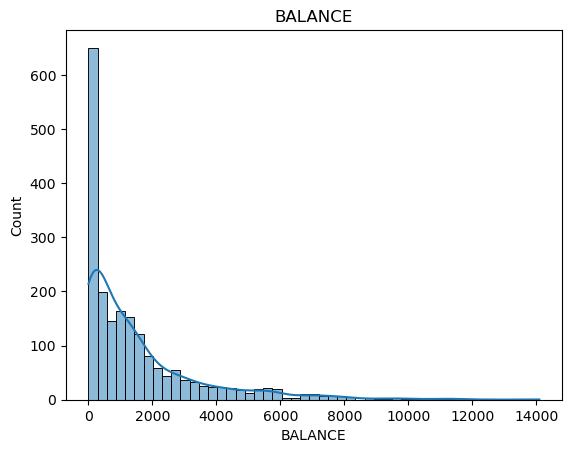

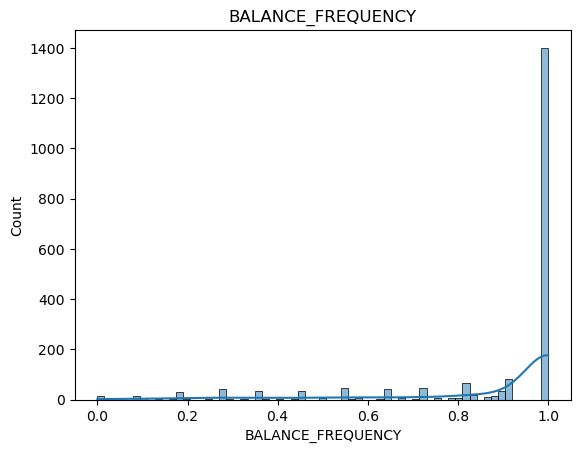

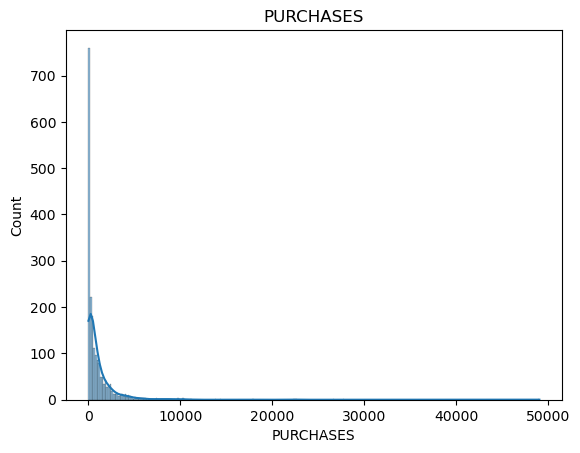

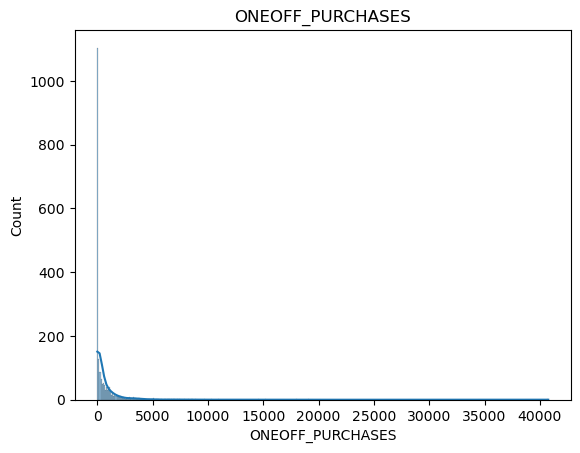

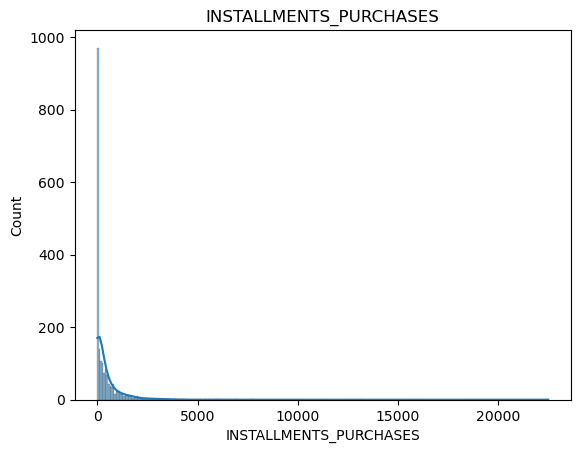

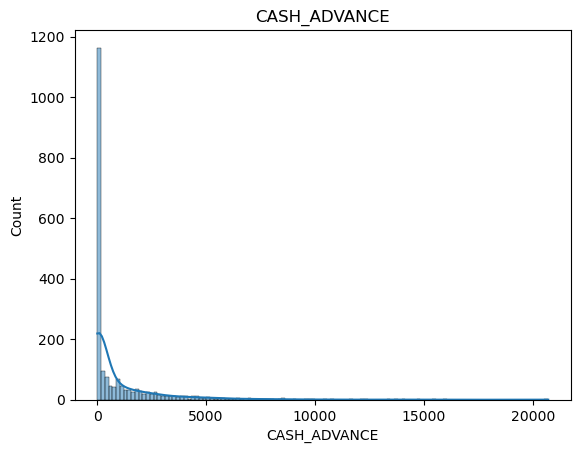

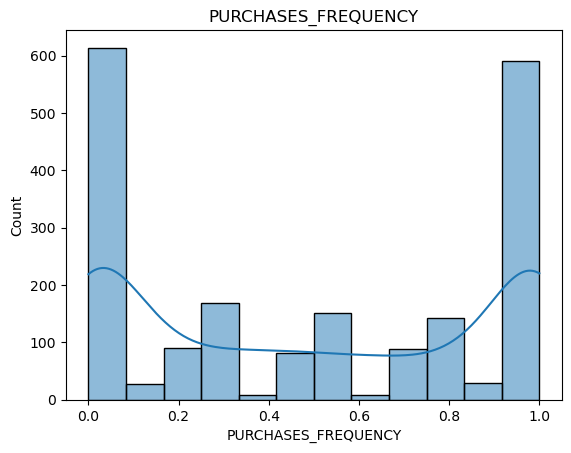

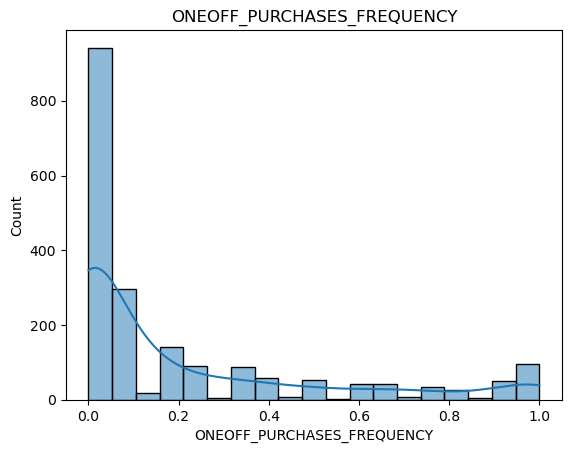

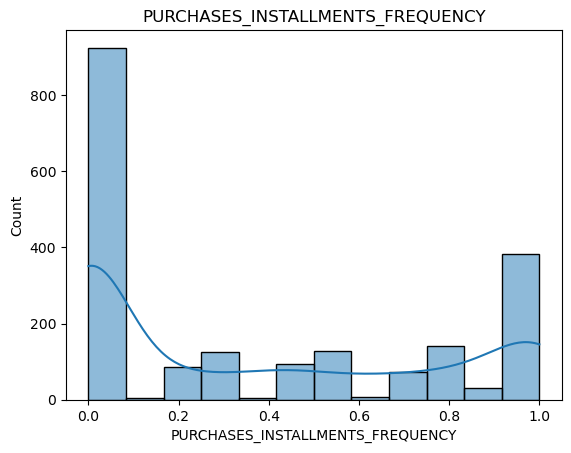

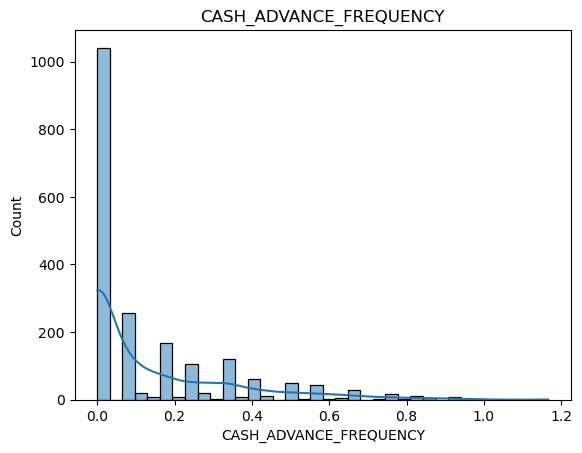

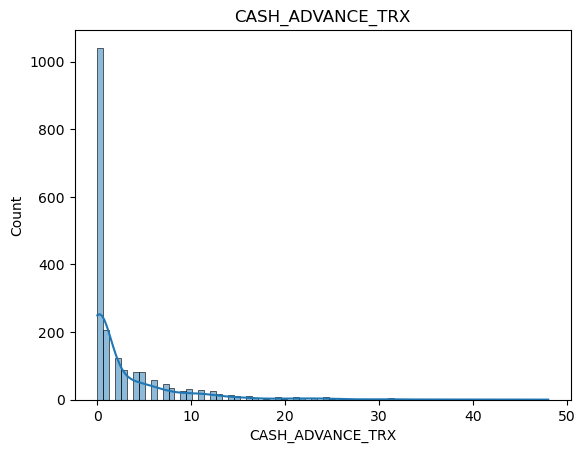

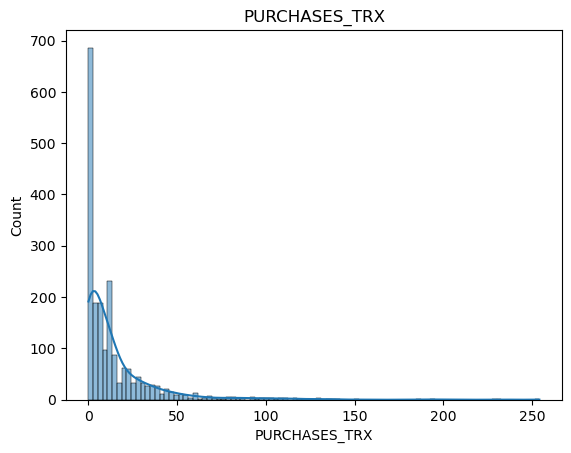

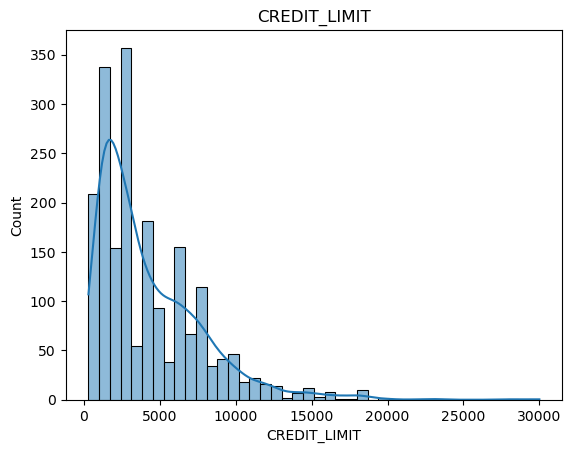

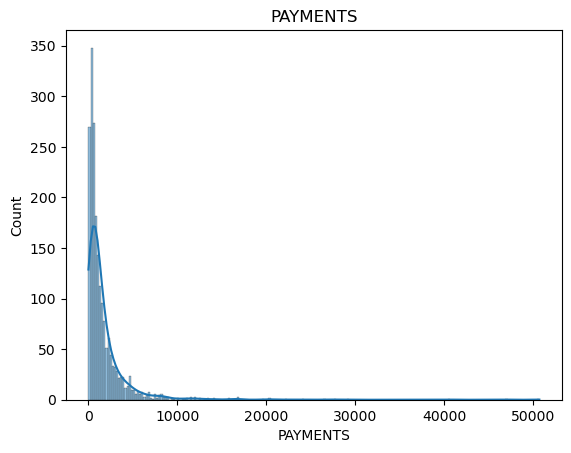

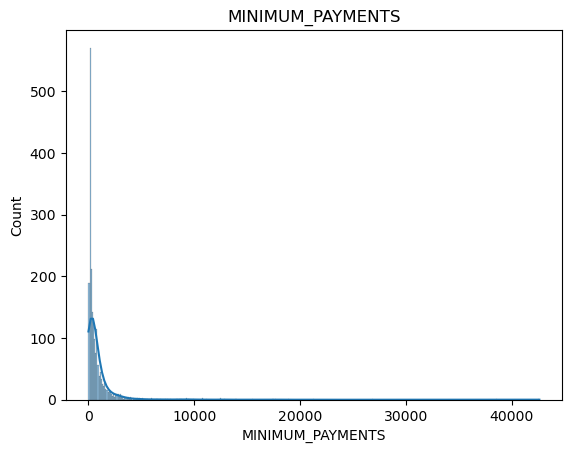

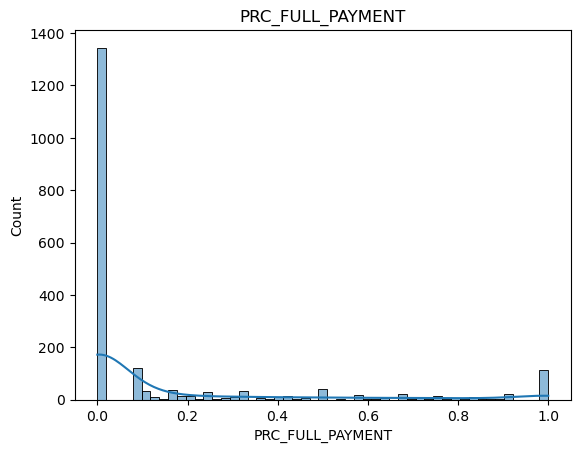

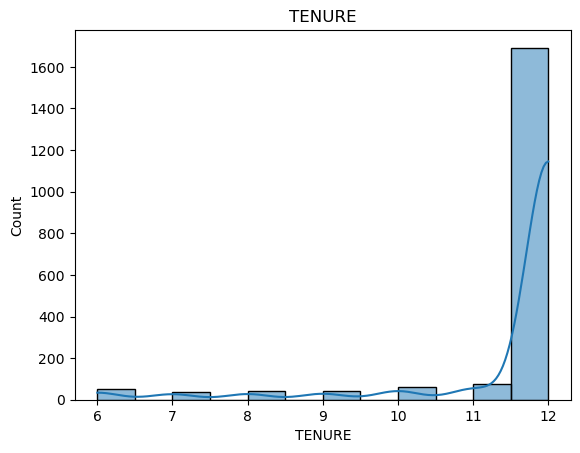

In [10]:
for col in df1.columns: 
    sns.histplot(df1[col], kde=True)
    plt.title(col)
    plt.show()

In [11]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df_yeojohnson = pd.DataFrame(pt.fit_transform(df1), columns=df1.columns)

print(df_yeojohnson.skew())

BALANCE                            -0.122077
BALANCE_FREQUENCY                  -1.149962
PURCHASES                          -0.177562
ONEOFF_PURCHASES                    0.100238
INSTALLMENTS_PURCHASES             -0.017861
CASH_ADVANCE                        0.195911
PURCHASES_FREQUENCY                -0.048281
ONEOFF_PURCHASES_FREQUENCY          0.537162
PURCHASES_INSTALLMENTS_FREQUENCY    0.210139
CASH_ADVANCE_FREQUENCY              0.520105
CASH_ADVANCE_TRX                    0.397966
PURCHASES_TRX                       0.002545
CREDIT_LIMIT                       -0.005098
PAYMENTS                            0.135450
MINIMUM_PAYMENTS                   -0.018278
PRC_FULL_PAYMENT                    1.002367
TENURE                             -1.956724
dtype: float64


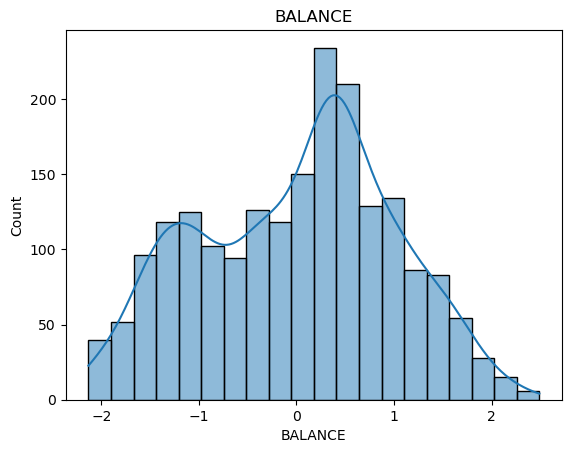

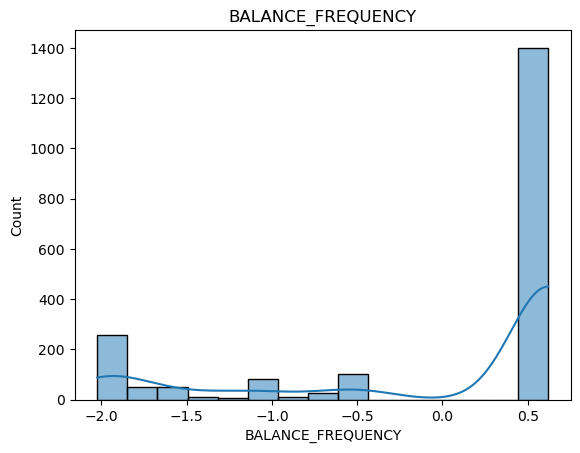

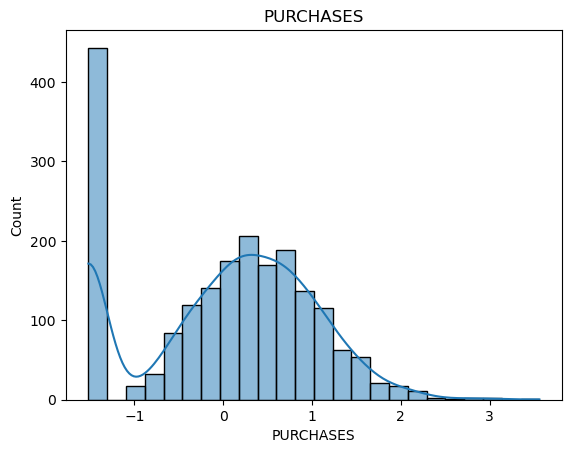

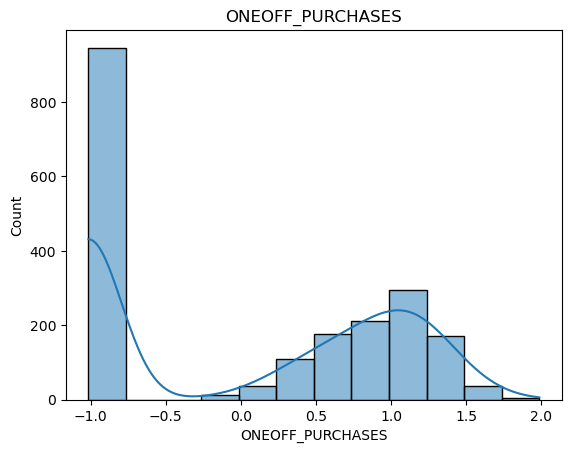

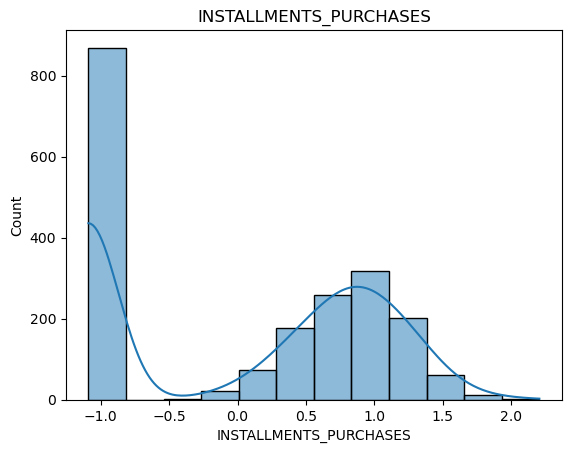

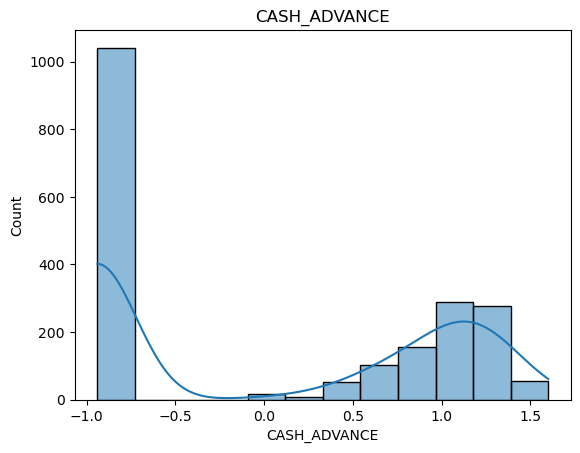

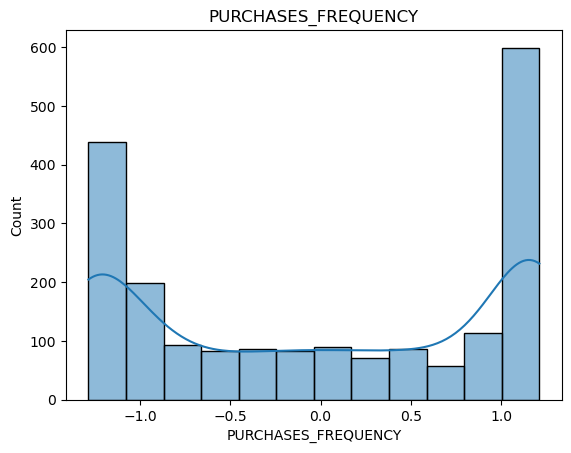

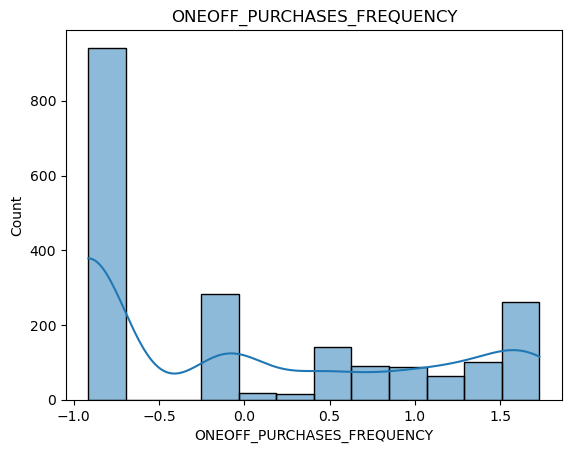

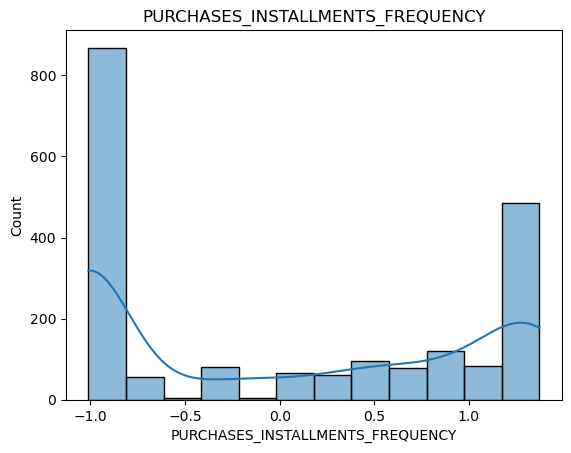

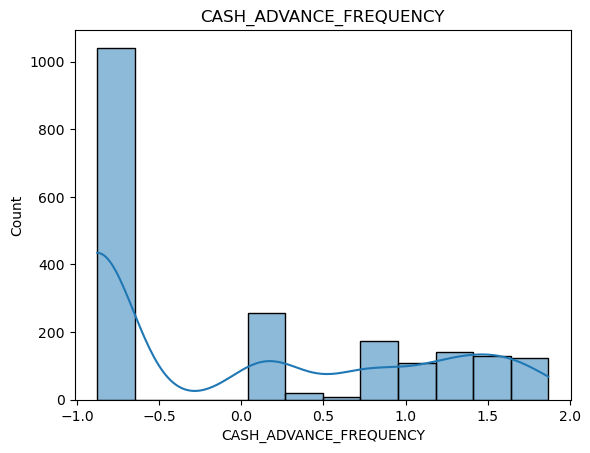

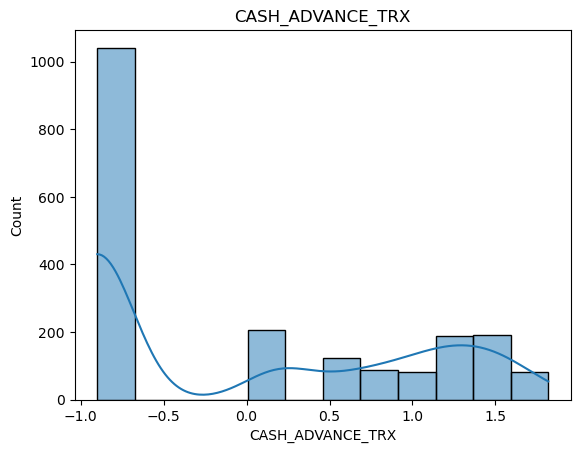

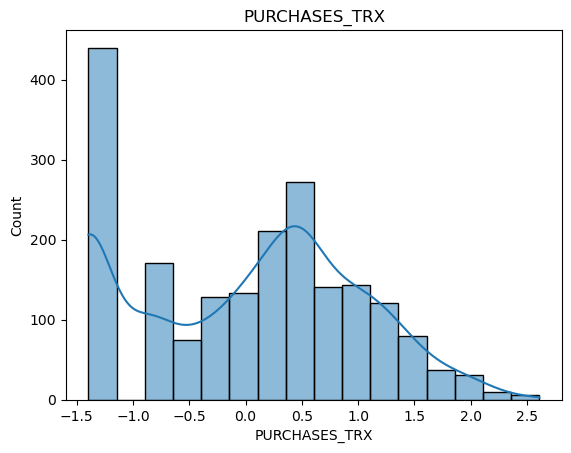

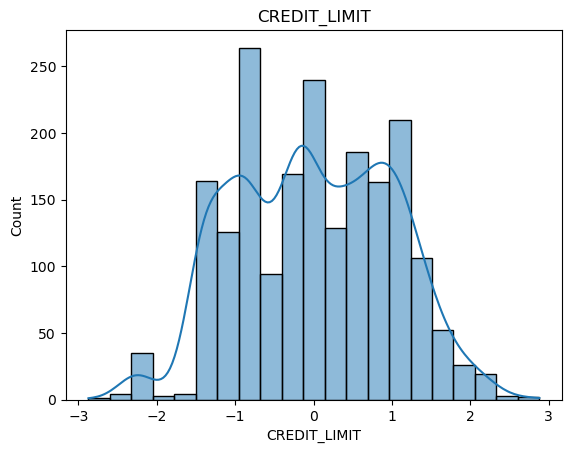

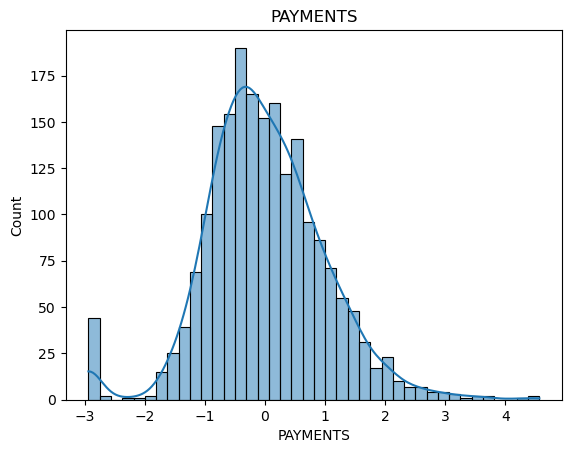

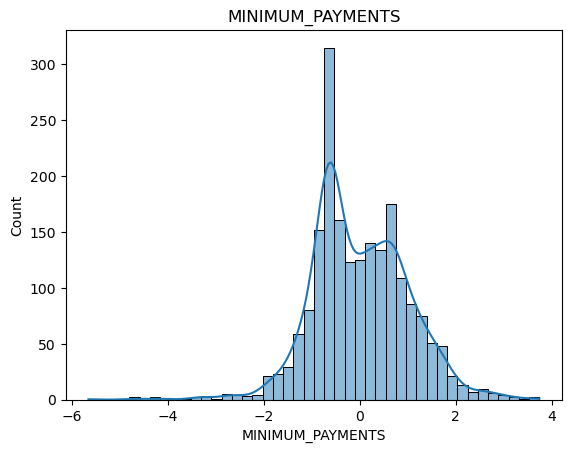

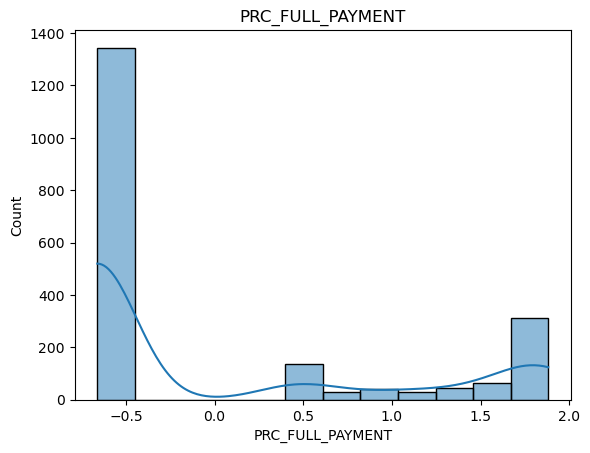

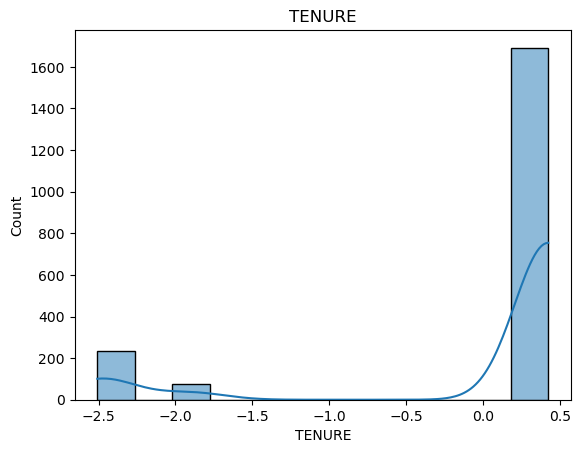

In [12]:
for col in df1.columns: 
    sns.histplot(df_yeojohnson[col], kde=True)
    plt.title(col)
    plt.show()

In [13]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))
print("Outliers count per column:\n", outliers.sum())

Outliers count per column:
 BALANCE                             157
BALANCE_FREQUENCY                   358
PURCHASES                           170
ONEOFF_PURCHASES                    218
INSTALLMENTS_PURCHASES              196
CASH_ADVANCE                        231
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          170
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY              122
CASH_ADVANCE_TRX                    179
PURCHASES_TRX                       164
CREDIT_LIMIT                         56
PAYMENTS                            176
MINIMUM_PAYMENTS                    181
PRC_FULL_PAYMENT                    366
TENURE                              308
dtype: int64


In [14]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_capped = df1.copy()
for col in df1.columns:
    df_capped[col] = np.where(df_capped[col] < lower_bound[col], lower_bound[col],
                              np.where(df_capped[col] > upper_bound[col], upper_bound[col],df_capped[col]))

In [15]:
Q1 = df_capped.quantile(0.25)
Q3 = df_capped.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_capped < (Q1 - 1.5 * IQR)) | (df_capped > (Q3 + 1.5 * IQR)))
print("Outliers count per column:\n", outliers.sum())

Outliers count per column:
 BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [16]:
df_scaled = pd.DataFrame(df_capped, columns=df.columns)
df_scaled.to_csv("scaled_dataset.csv", index=False)

In [17]:
import autoviz as av

AV = av.AutoViz_Class()

df1 = AV.AutoViz(
    filename="C:/Users/kavin/OneDrive/Desktop/clustering k means/CC_GENERAL_SAMPLE.csv",
    sep=',',
    depVar='',
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format='svg',
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (2000, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  14
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number o

Number of All Scatter Plots = 105
All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


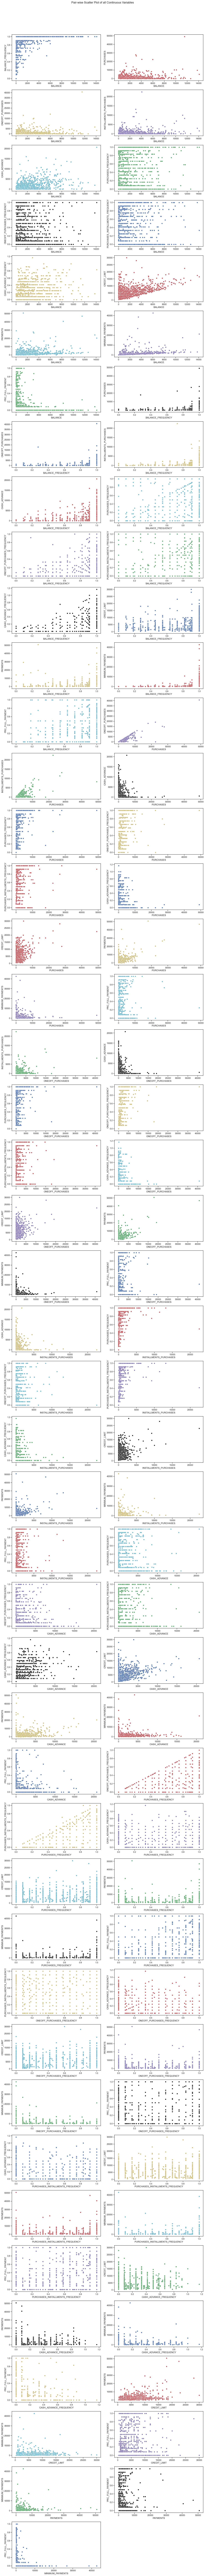

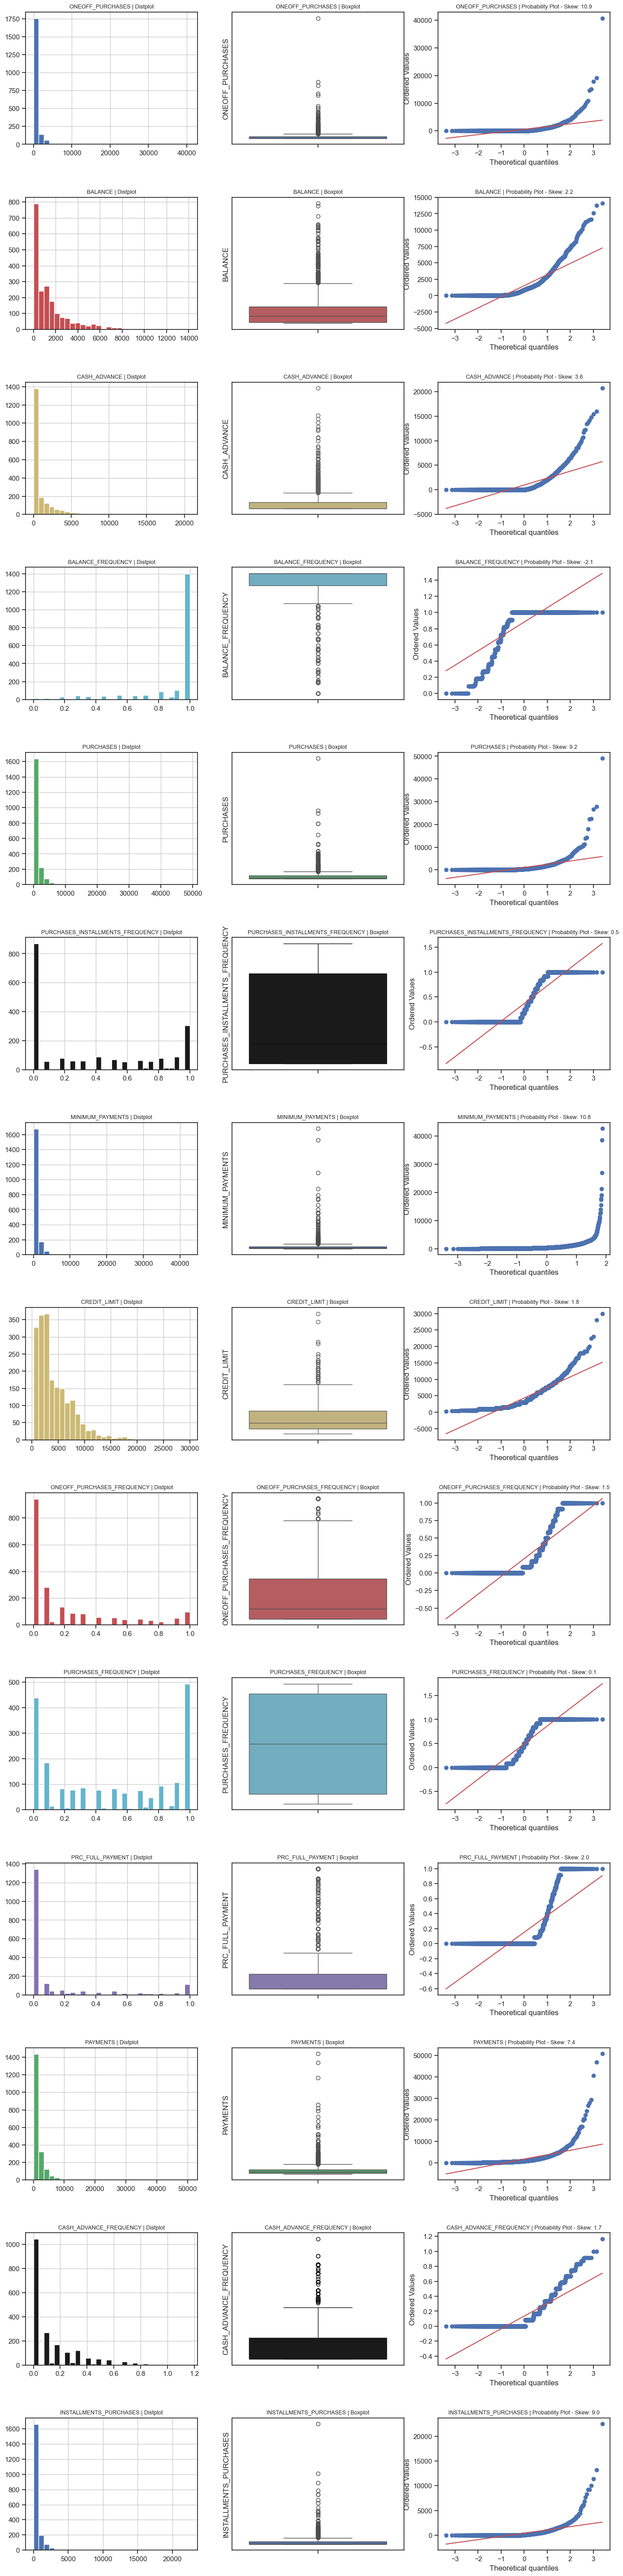

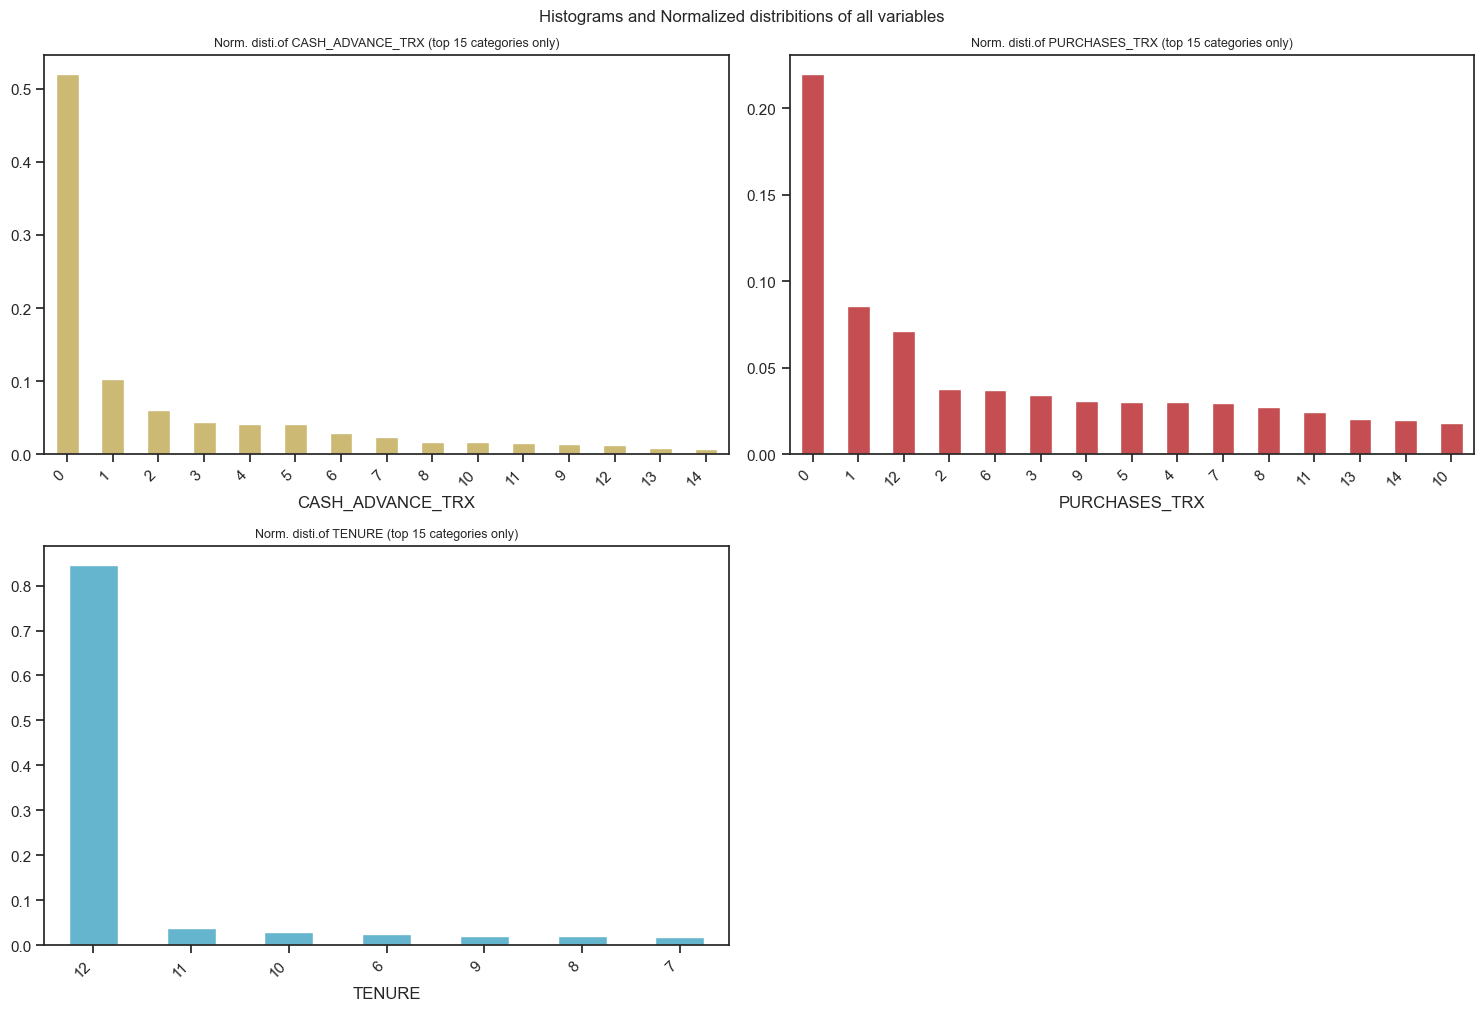

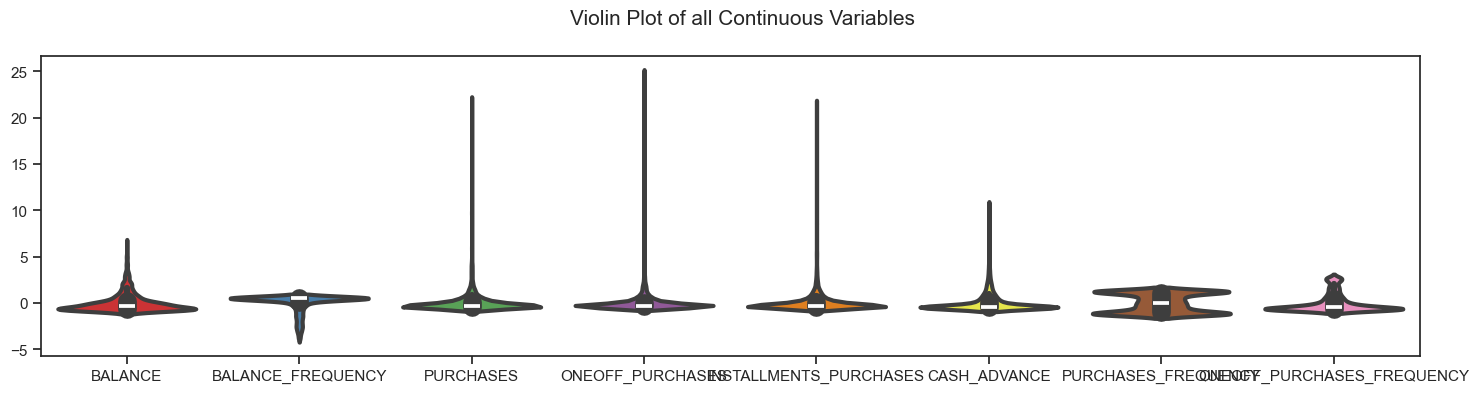

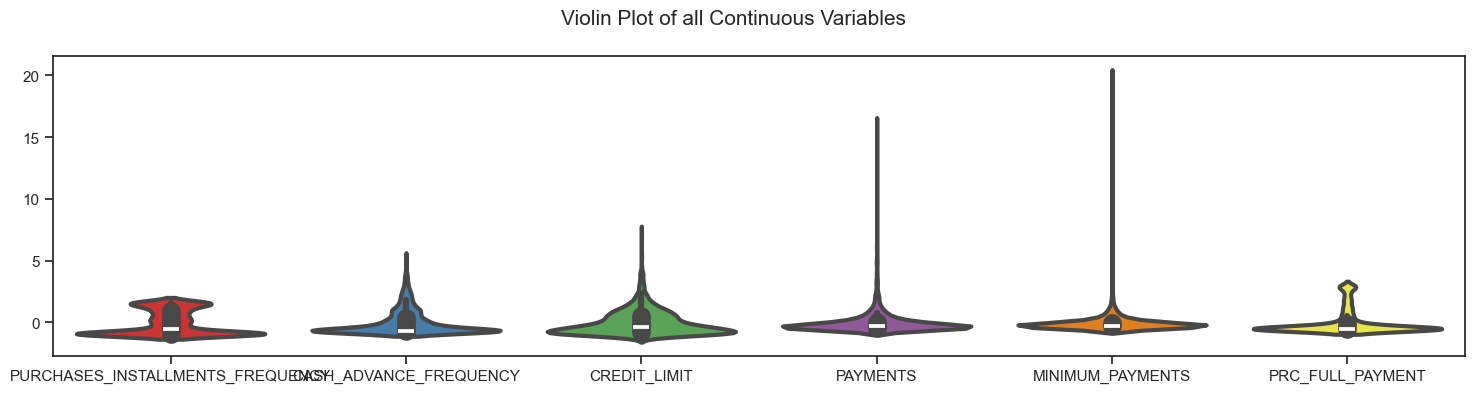

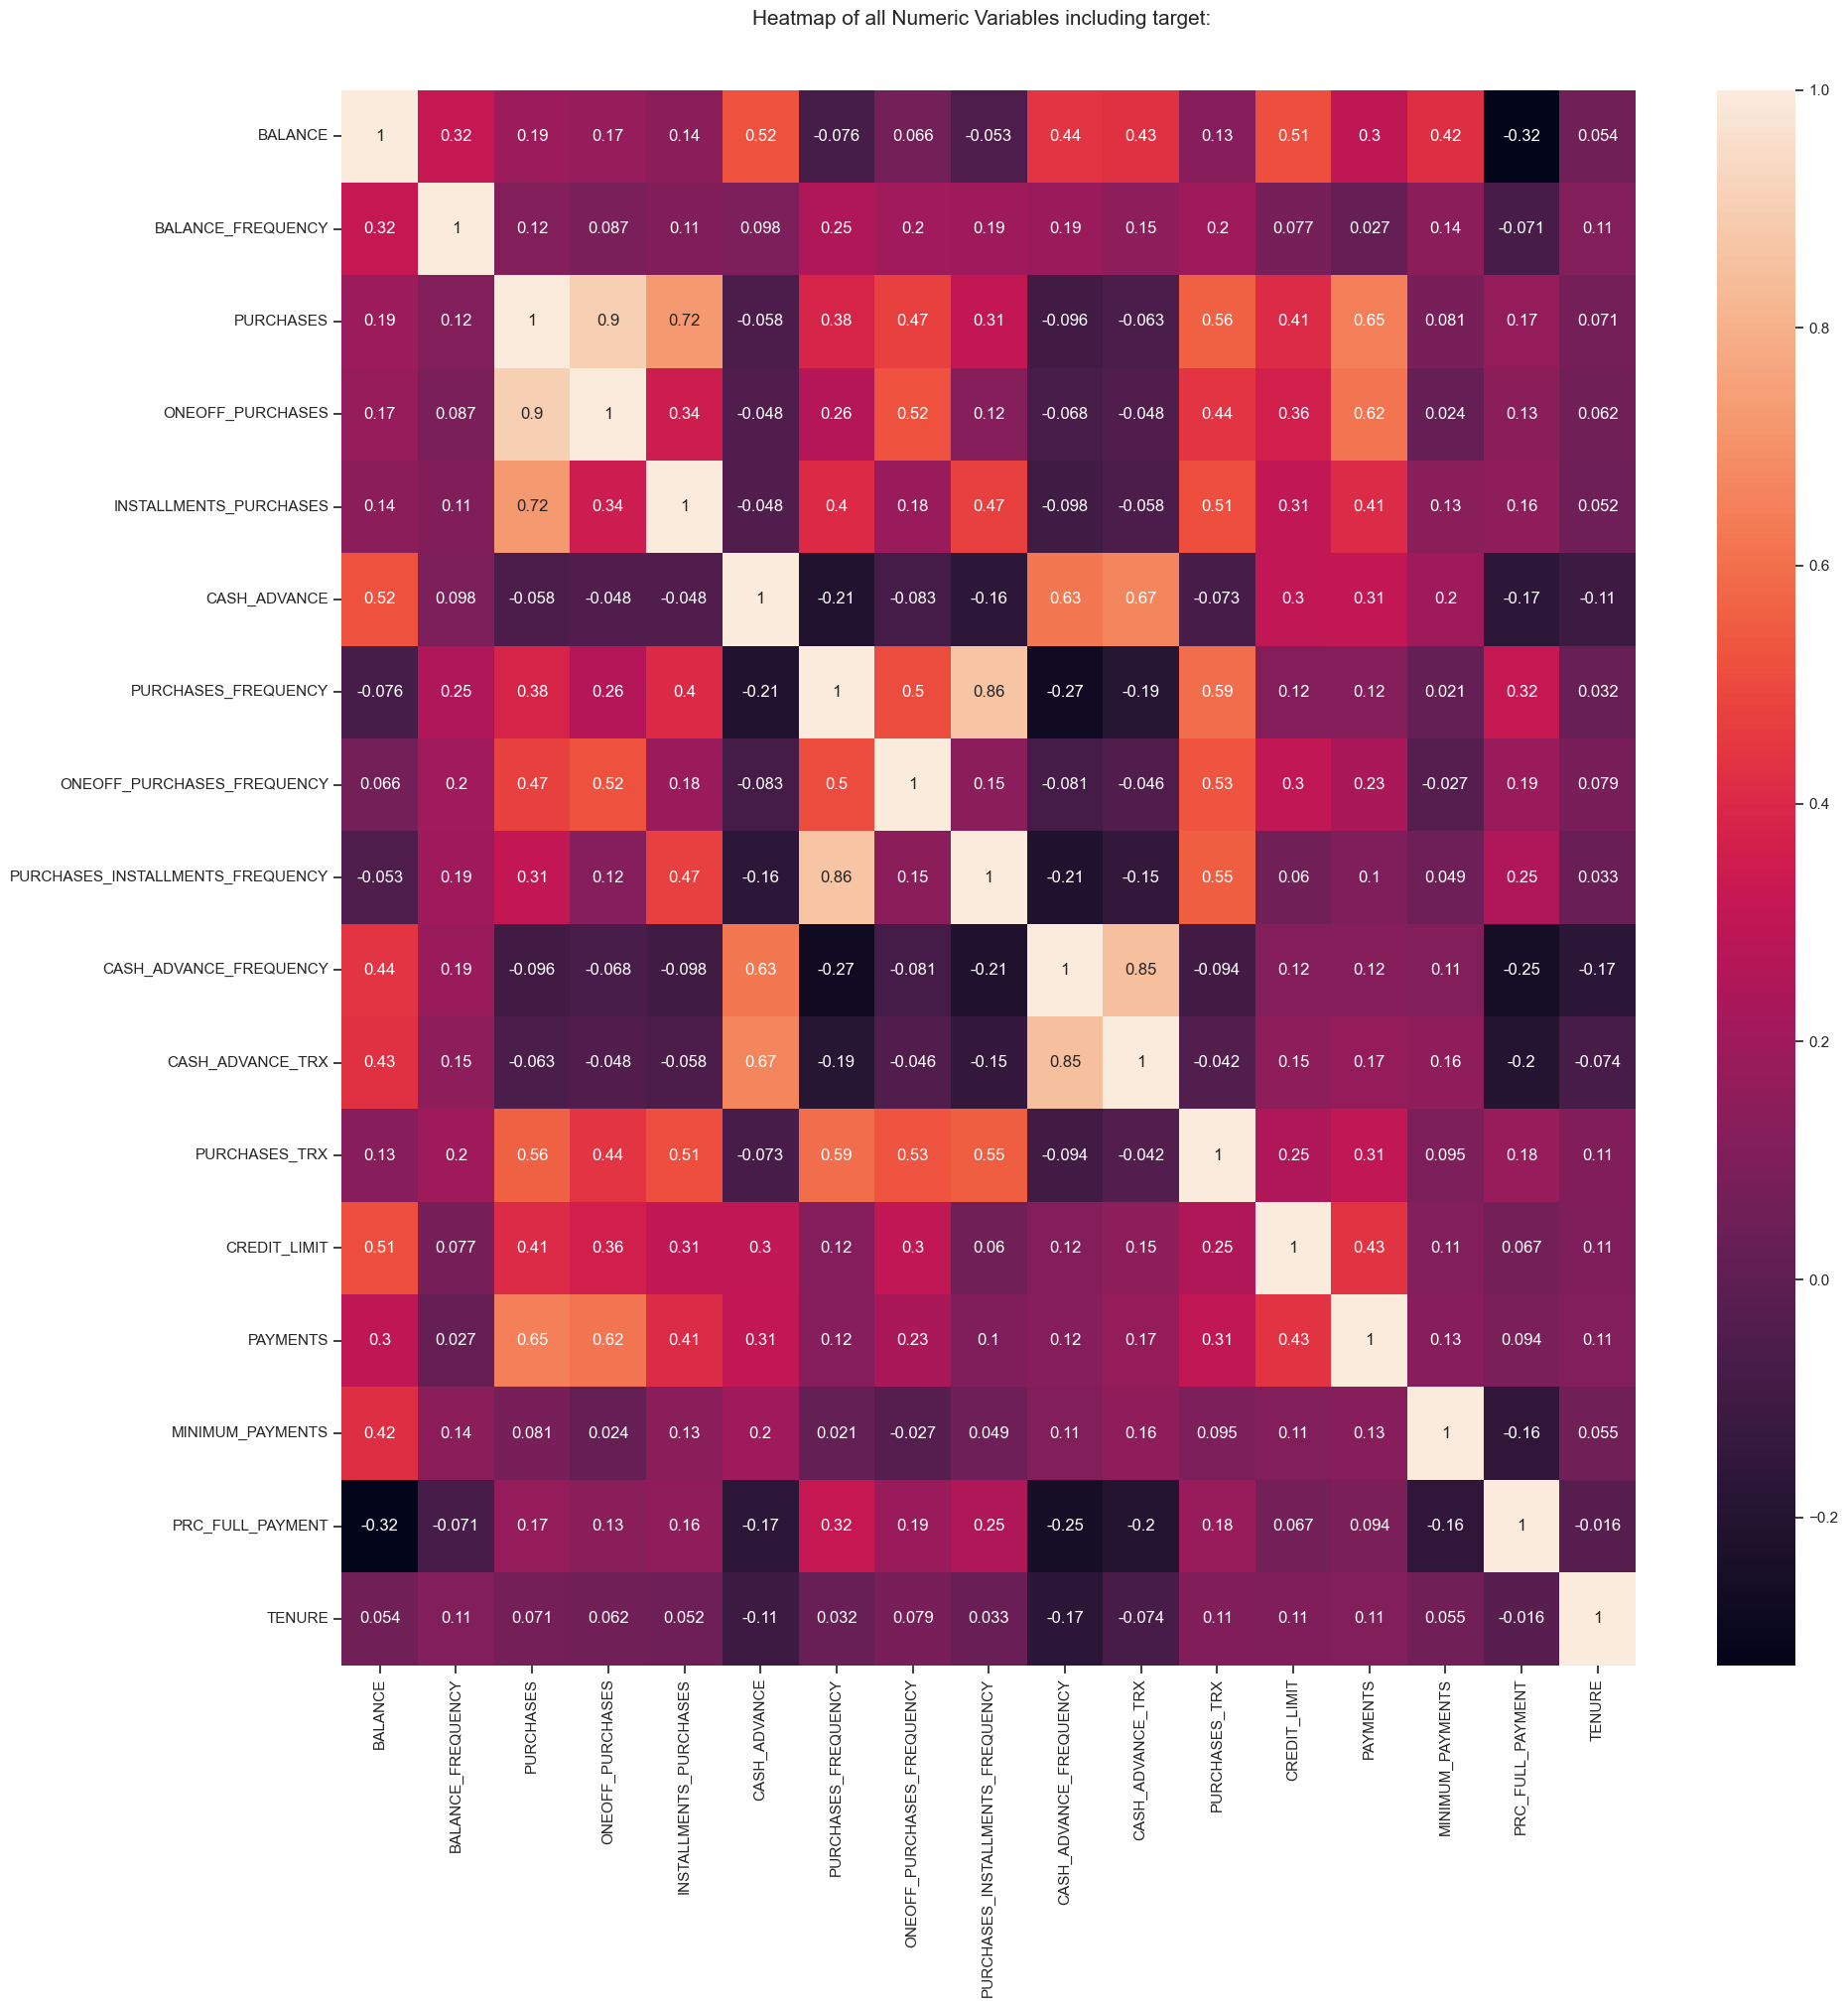

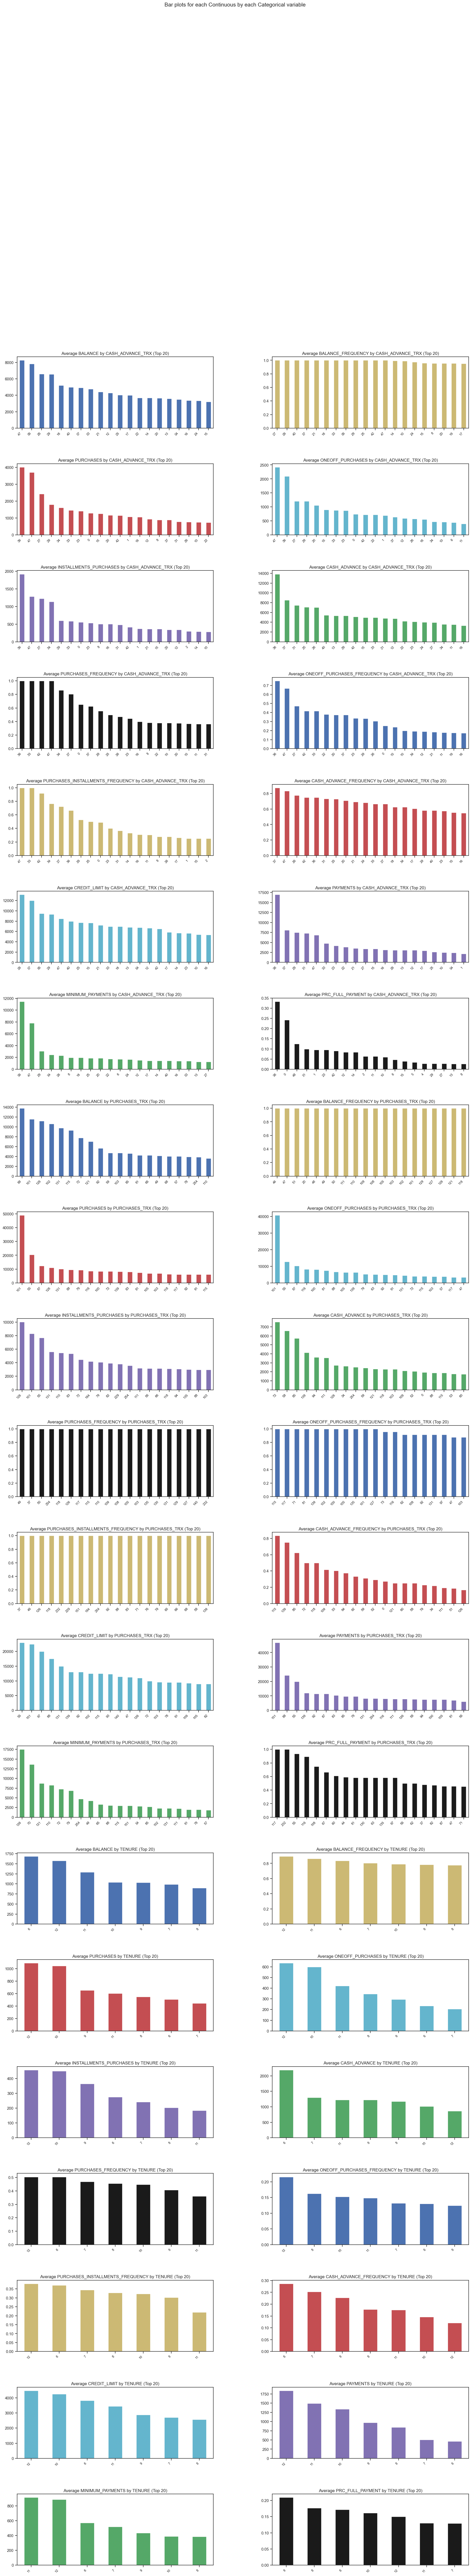

In [18]:
%matplotlib inline
plt.show()